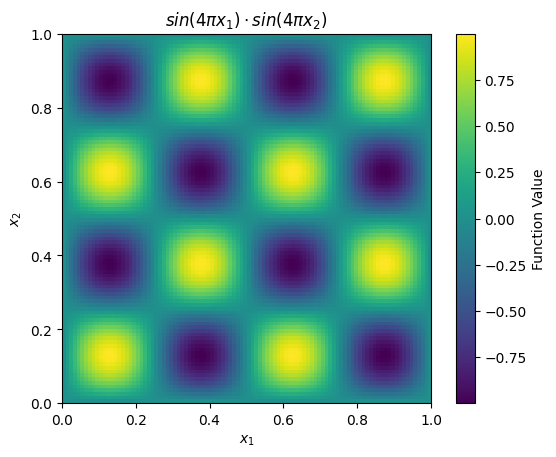

In [1]:
from models_and_procedures_definitions_updated import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

learning_rate_val = 0.001
epochs_num = 200
batch_size_val = 100

# Create a grid of points in the domain [0, 1]^2 
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1, x2)

# Compute the function values at the grid points
Z = f(X1, X2)

# Plot the target function using imshow
plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap='viridis')
plt.colorbar(label='Function Value')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$sin(4 \pi x_1) \cdot sin(4 \pi x_2)$')
plt.savefig('target_function.png', dpi=300, bbox_inches='tight')
#plt.close()
plt.show()

Training Wide ReLU ANN...
Training Deep ReLU ANN...
Training Spline ANN (z=20)...
Training ABEL-Spline (z=20)...
Training Lookup Table (z=20)...
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


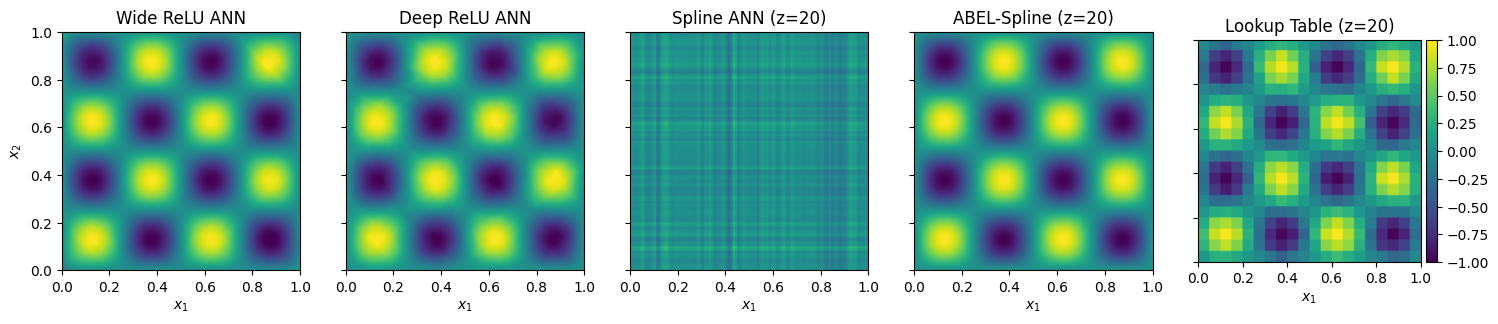

In [2]:
models = initialize_all_models(input_dimension=2, seed_val=42)
#compile_models(models)

# Set the seed
np.random.seed(1)

# Generate the training data
X_train = np.random.uniform(0, 1, (16000, 2))
y_train = f(X_train[:, 0], X_train[:, 1])


# Initialize list to store history of losses for each model
histories = []

# Fit each model to the training data
for model, name in models:
    print(f"Training {name}...")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_val), loss='mean_absolute_error')
    history = model.fit(X_train, y_train, epochs=epochs_num, batch_size=batch_size_val, verbose=0, shuffle=True)
    histories.append(history)
    
predictions = predict_models(models)
plot_predictions(models, predictions, plot_name='predictions', save=False)
plot_predictions(models, predictions, plot_name='predictions', save=True)

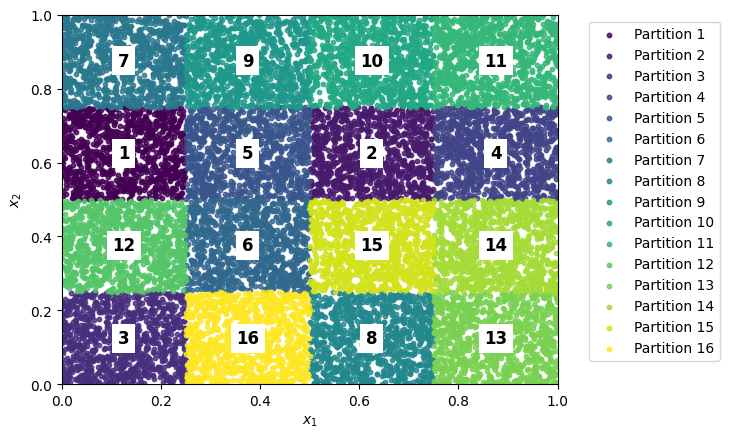

In [3]:
# Define the number of partitions per dimension
n_partitions = 4

# Number of samples per partition
n_samples = 1000

partitions=create_partitions(n_partitions)
X,y=generate_training_data(partitions,n_samples)
plot_training_data(partitions,X,y,n_samples, plot_name='partitions', save=False)
plot_training_data(partitions,X,y,n_samples, plot_name='partitions', save=True)


partition_input_training = np.split(X,16)
partition_target_training = np.split(y,16)

Partition index is 0
Partition index is 1
Partition index is 2
Partition index is 3
Partition index is 4
Partition index is 5
Partition index is 6
Partition index is 7
Partition index is 8
Partition index is 9
Partition index is 10
Partition index is 11
Partition index is 12
Partition index is 13
Partition index is 14
Partition index is 15
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


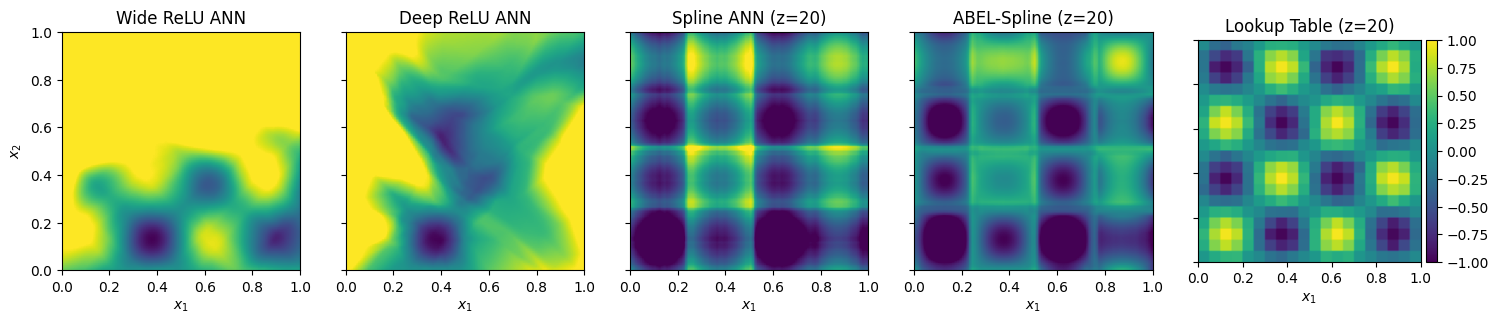

In [4]:
models = initialize_all_models(input_dimension=2, seed_val=1)
#compile_models(models)

for partition_index in range(16):
    print(F"Partition index is {partition_index}")
    X_train = partition_input_training[partition_index]
    y_train = partition_target_training[partition_index]
    # Initialize list to store history of losses for each model
    histories_sequential = []

    # Fit each model to the training data
    for model, name in models:
        #print(f"Training {name}...")
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_val), loss='mean_absolute_error')
        history = model.fit(X_train, y_train, epochs=epochs_num, batch_size=batch_size_val, verbose=0)
        histories_sequential.append(history)
        
    # can also plot the outputs after training on each subset
    #predictions = predict_models(models)
    #plot_predictions(models, predictions, plot_name='predictions', save=False)

predictions = predict_models(models)
plot_predictions(models, predictions, plot_name='sequential_continual_learning', save=False)
plot_predictions(models, predictions, plot_name='sequential_continual_learning', save=True)



Partition index is 0
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


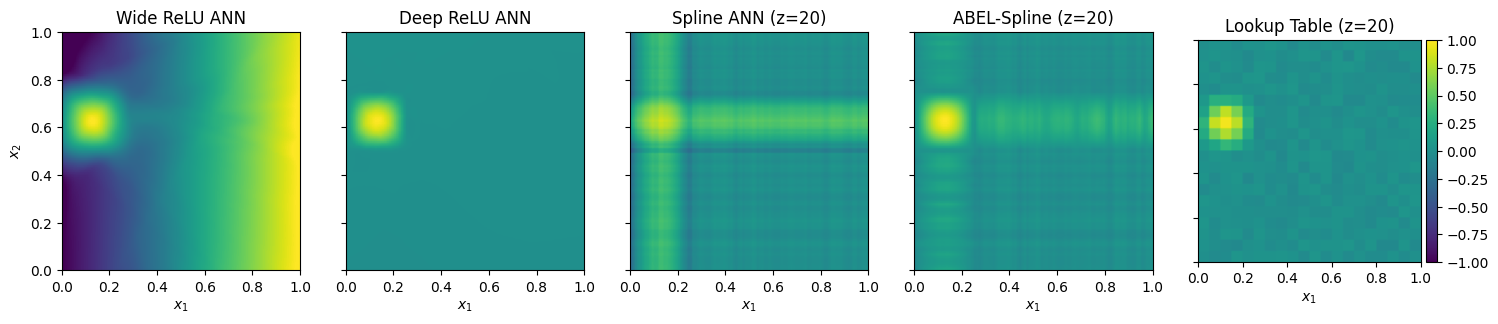

Partition index is 1
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


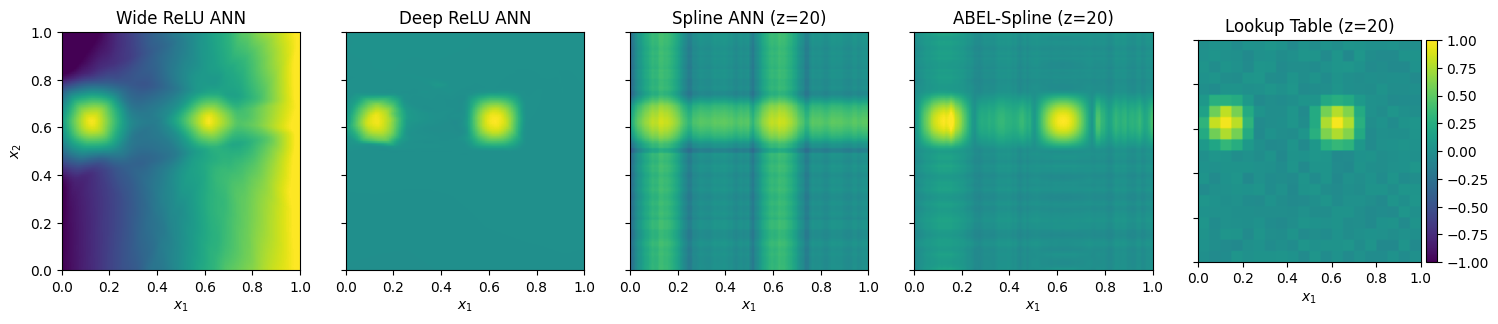

Partition index is 2
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


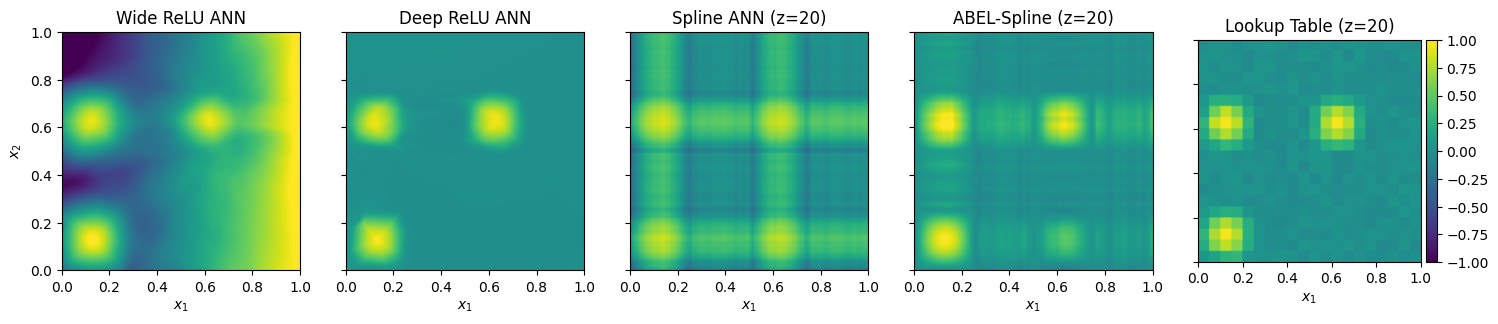

Partition index is 3
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


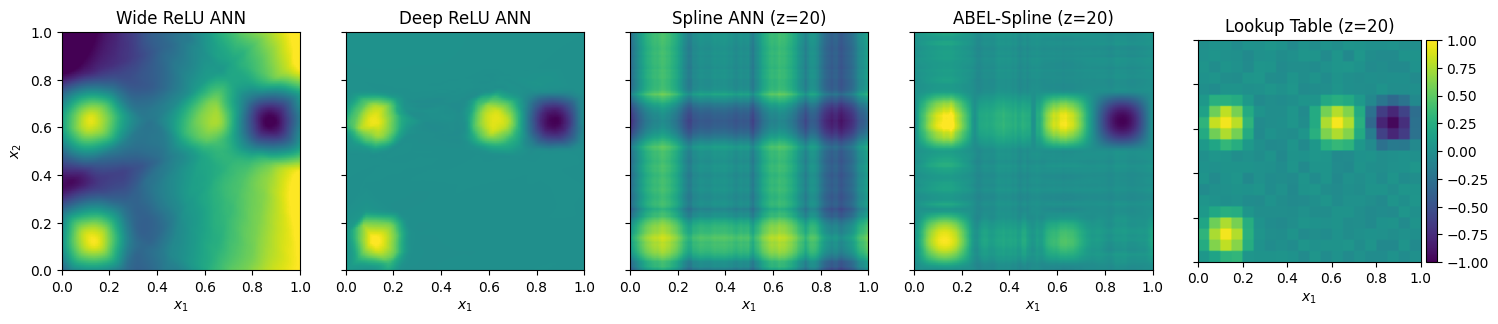

Partition index is 4
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


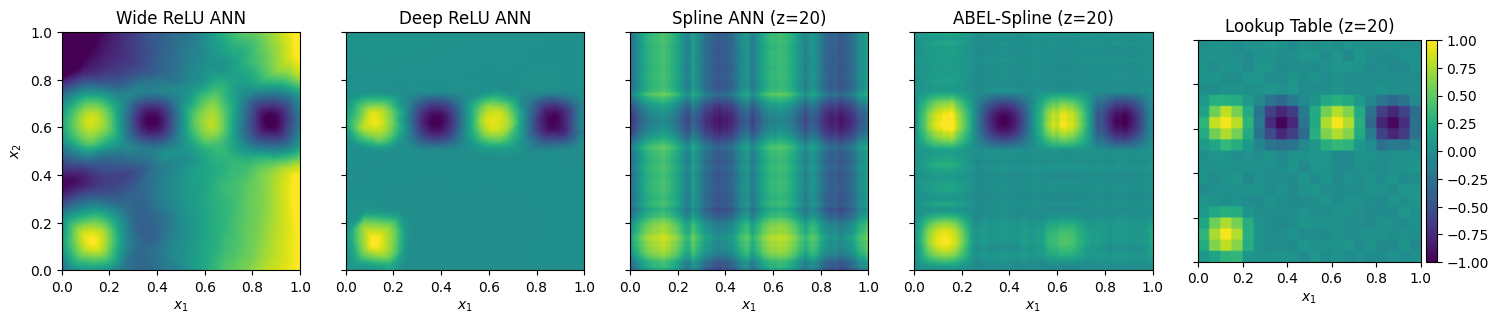

Partition index is 5
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


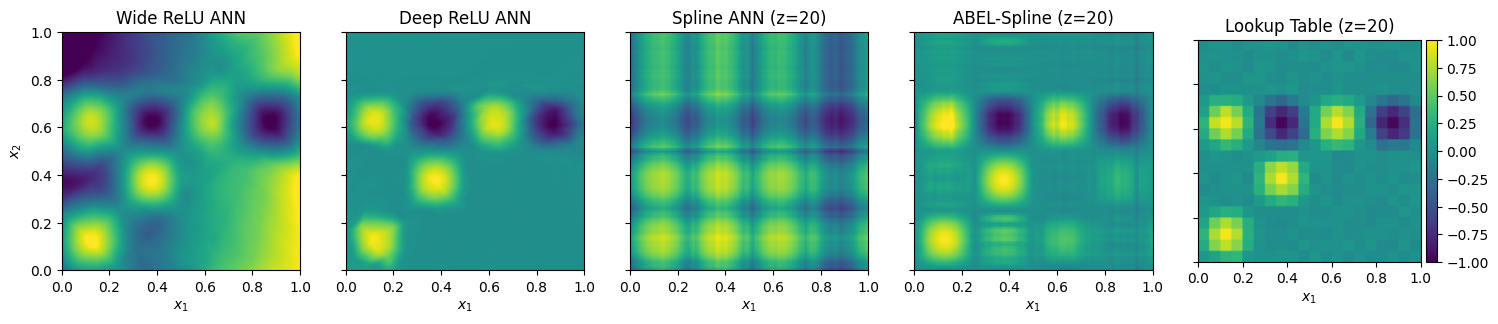

Partition index is 6
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


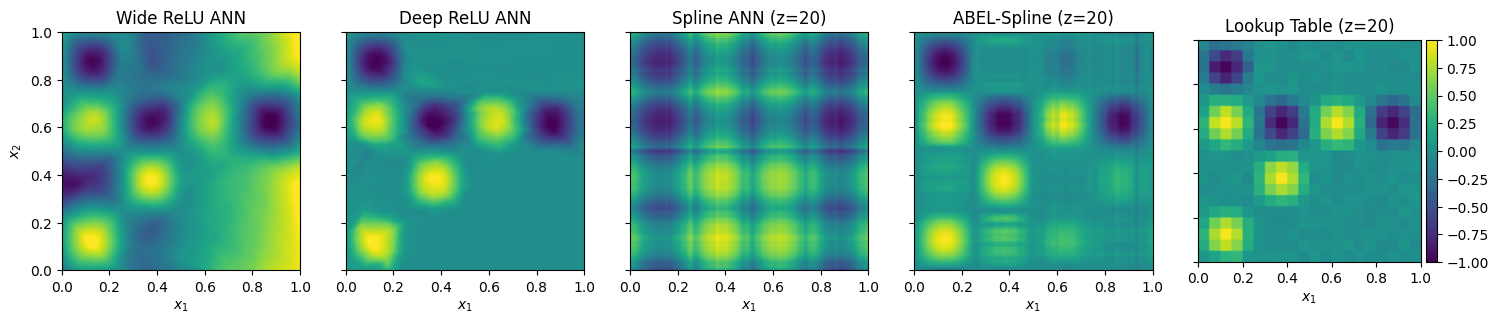

Partition index is 7
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


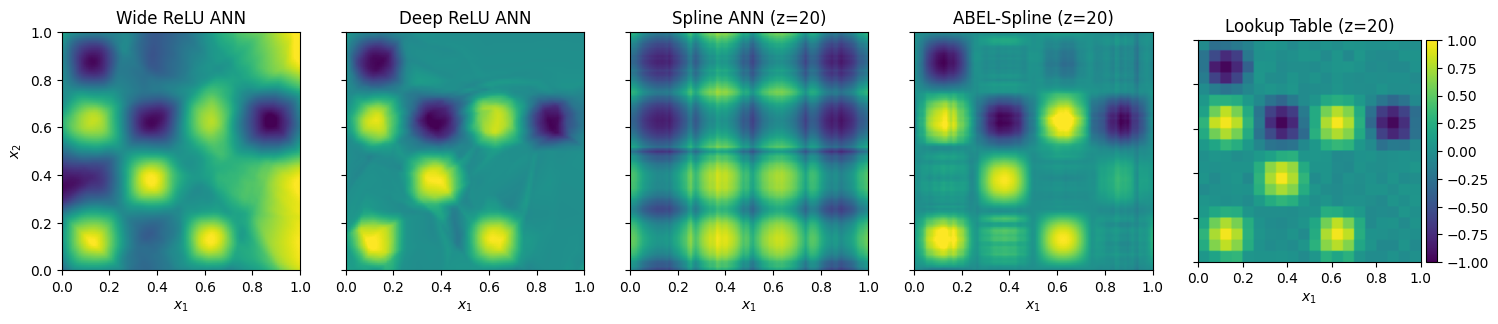

Partition index is 8
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


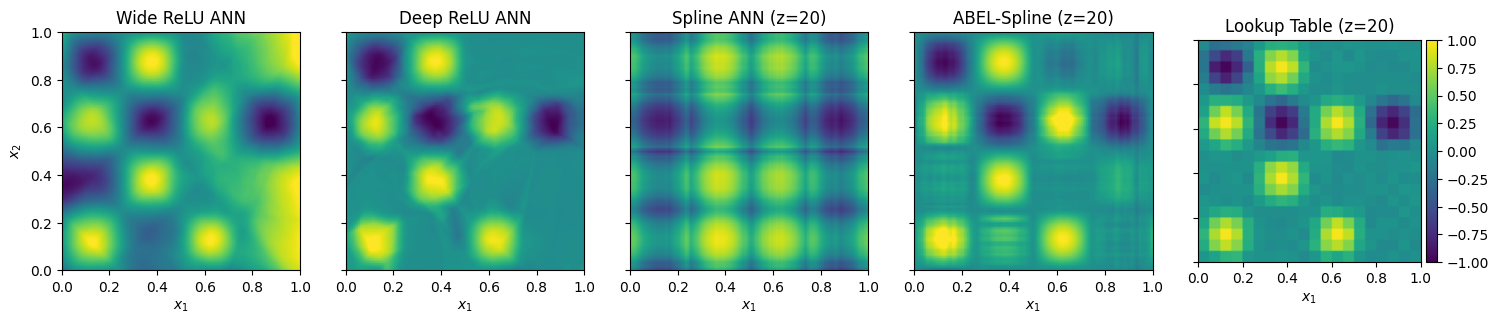

Partition index is 9
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


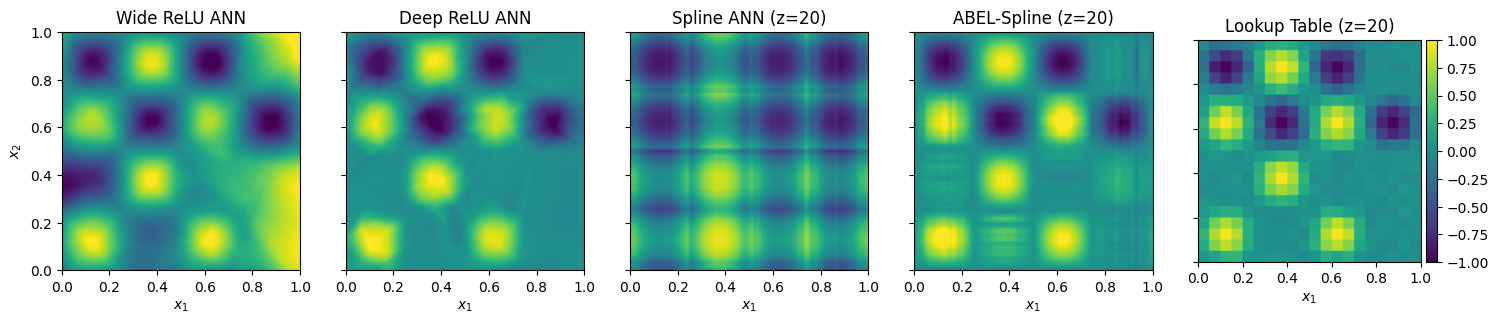

Partition index is 10
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


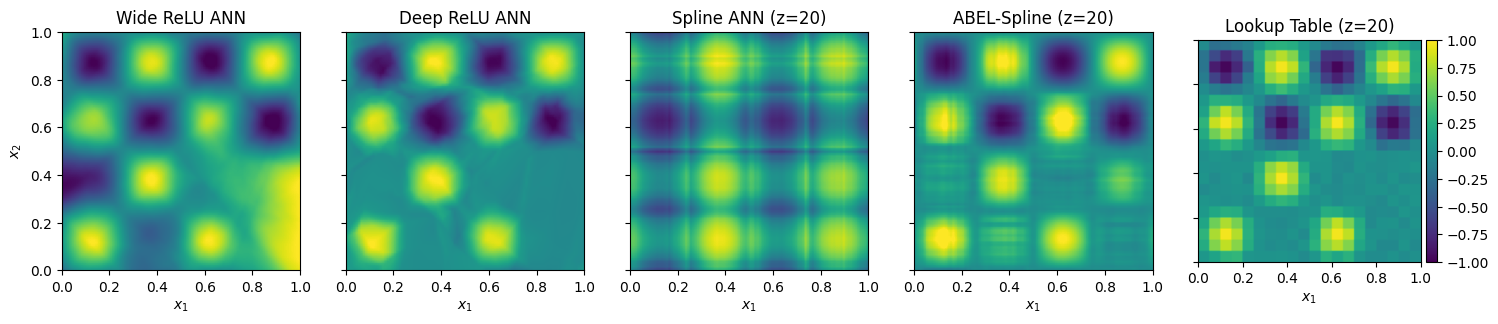

Partition index is 11
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


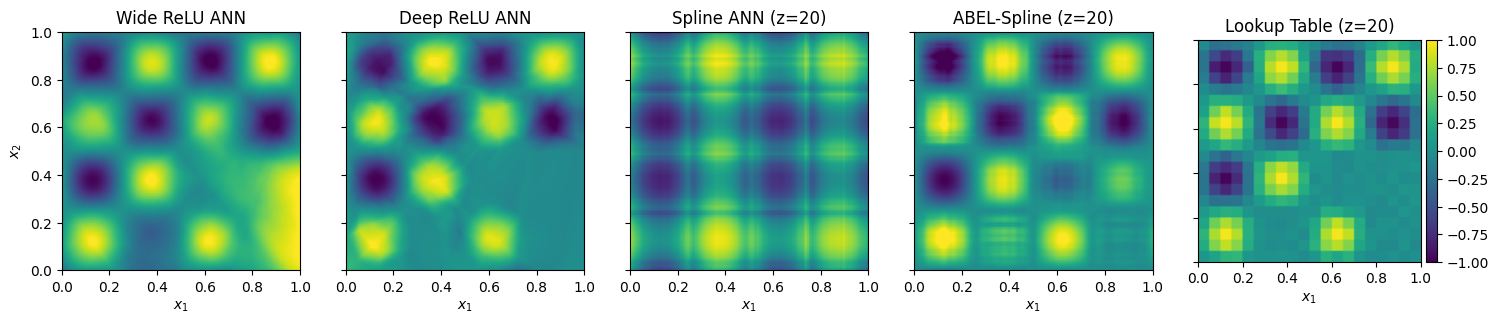

Partition index is 12
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


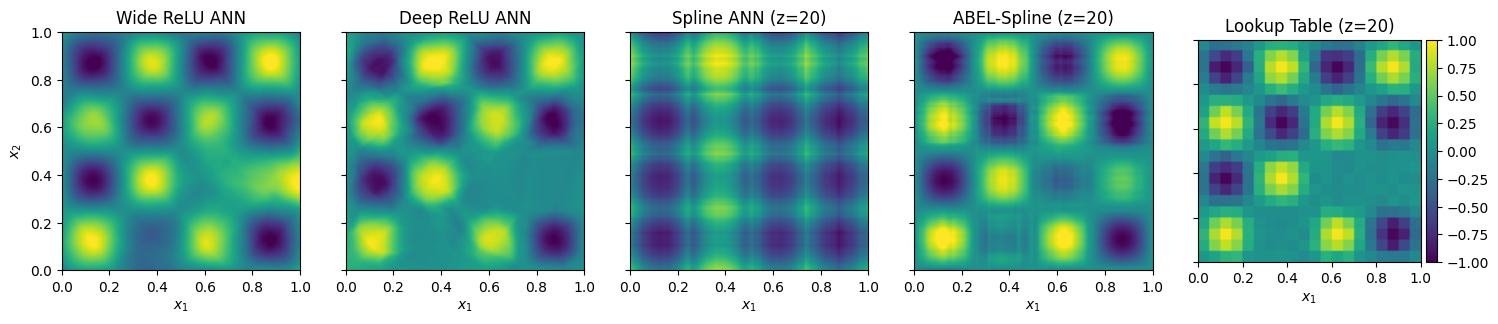

Partition index is 13
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


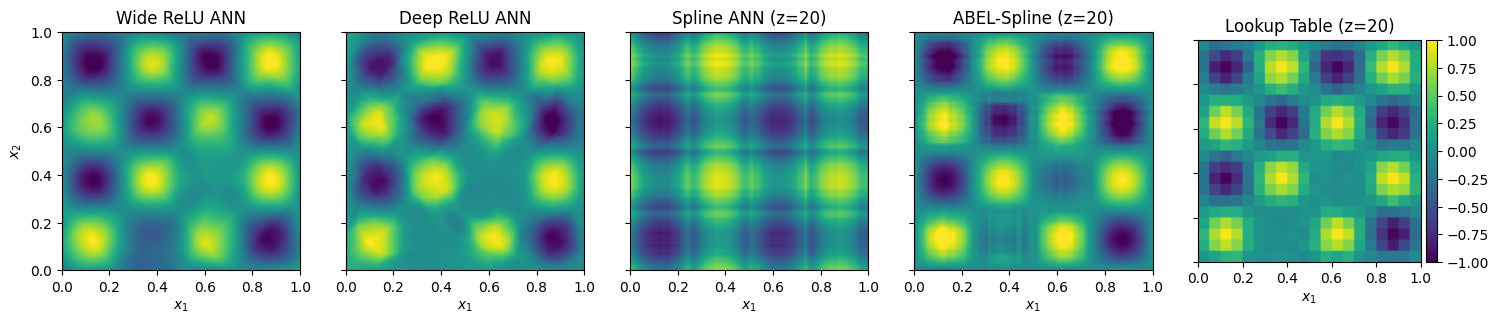

Partition index is 14
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


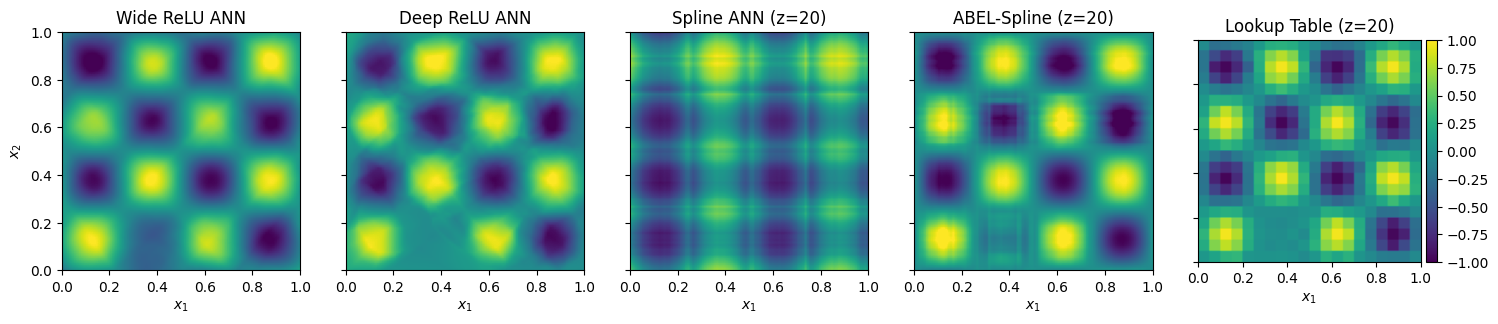

Partition index is 15
Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


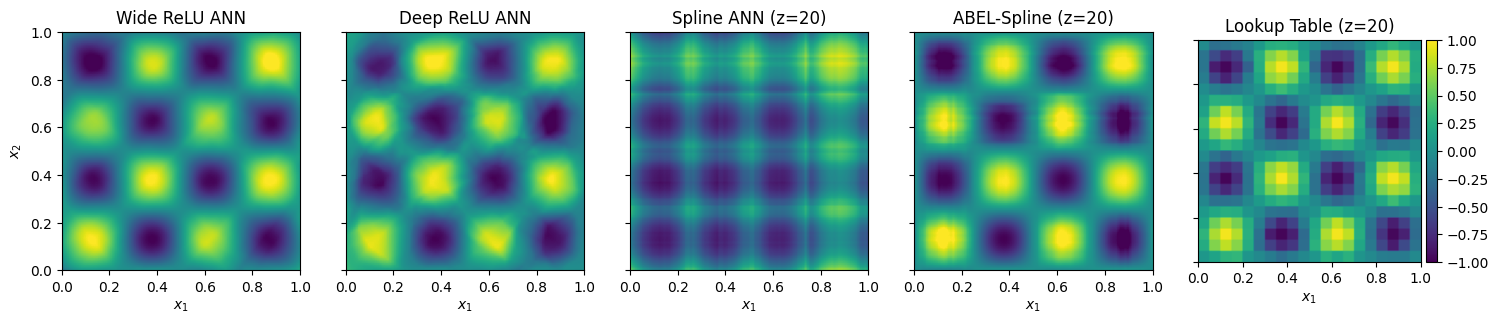

Predicting with Wide ReLU ANN...
Predicting with Deep ReLU ANN...
Predicting with Spline ANN (z=20)...
Predicting with ABEL-Spline (z=20)...
Predicting with Lookup Table (z=20)...


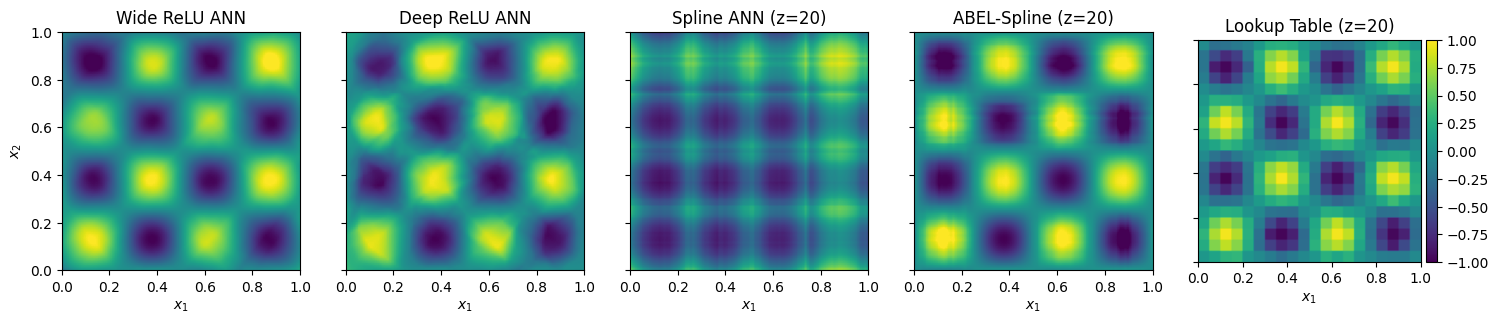

In [5]:
models = initialize_all_models(input_dimension=2, seed_val=2)
#compile_models(models)

num_pseudorehearsal_samples = 1000

for partition_index in range(16):
    print(F"Partition index is {partition_index}")
    X_train = partition_input_training[partition_index]
    y_train = np.reshape(partition_target_training[partition_index],(n_samples,1))
    # Initialize list to store history of losses for each model
    histories_sequential = []

    # Fit each model to the training data
    for model, name in models:
        # Generate pseudorehearsal samples and combine them with the current training data
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_val), loss='mean_absolute_error')
        X_train_augmented, y_train_augmented = pseudorehearsal(2, num_pseudorehearsal_samples,
                                                                model,
                                                                X_train,
                                                                y_train,
                                                                seed_val=0)
        #print(f"Training {name}...")
        history = model.fit(X_train_augmented, 
                            y_train_augmented, 
                            epochs=epochs_num, 
                            batch_size=batch_size_val, 
                            verbose=0)
        histories_sequential.append(history)
        
    # can also plot the outputs after training on each subset
    predictions = predict_models(models)
    plot_predictions(models, predictions, plot_name='predictions', save=False)

predictions = predict_models(models)
plot_predictions(models, predictions, plot_name='pseudo_rehearsal_continual_learning', save=False)
plot_predictions(models, predictions, plot_name='pseudo_rehearsal_continual_learning', save=True)
